In [1]:
from IPython.display import FileLink

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
library(DESeq2)
library(phyloseq)
library(plyr); library(dplyr)
library(ggplot2)
library(doParallel)
library(foreach)
library(reshape)
library(RColorBrewer)
library(gridExtra)

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from ‘package:stats’:

    xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    do.call, duplicated, eval, evalq, Filter, Find, get, intersect,
    is.unsorted, lapply, Map, mapply, match, mget, order, paste, pmax,
    pmax.int, pmin, pmin.int, Position, rank, rbind, Reduce, rep.int,
    rownames, sapply, setdiff, sort, table, tapply, union, unique,
    unlist, unsplit

Loading required package: IRanges
Loading required package: GenomicRanges
Loading required package:

In [4]:
%%R
dat = read.csv("/home/ashley/single_substrate/data/df_resp_SS_counts.csv",header=TRUE)

In [5]:
%%R
dat = dat %>% arrange(desc(Counts))
dat

            Phylum Counts Treatment
1   Proteobacteria     16    13CCSS
2  Verrucomicrobia      6    13CCPS
3  Verrucomicrobia      5    13CCSS
4   Proteobacteria      4    13CCPS
5      Chloroflexi      3    13CCSS
6      Chloroflexi      3    13CCPS
7   Planctomycetes      3    13CCPS
8    Bacteroidetes      2    13CCSS
9    Acidobacteria      1    13CCSS
10  Planctomycetes      1    13CCSS
11    Spirochaetes      1    13CCSS
12   Bacteroidetes      1    13CCPS
13   Cyanobacteria      1    13CCPS
14   Cyanobacteria      0    13CCSS
15   Acidobacteria      0    13CCPS
16    Spirochaetes      0    13CCPS


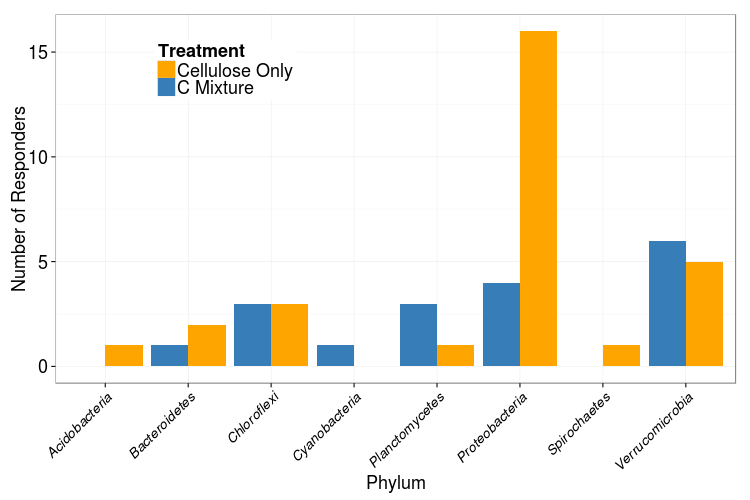

In [6]:
%%R -h 500 -w 750

colours = c("#377eb8","orange")

p = ggplot(dat, aes(y = Counts, x = Phylum, fill = Treatment, order = Counts))

#p = p + facet_grid(Treatment~Day)

p = p + geom_bar(stat = "identity", position = "dodge")

p = p + theme_bw()

p = p + theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 18), 
              axis.text.y = element_text(size = 18),
              strip.text = element_text(size = 18),
              strip.background = element_blank(),
              axis.title = element_text(size = 18),
              legend.title = element_text(size = 18),
              legend.text = element_text(size = 18))

p = p + labs(fill = "Treatment", y = "Number of Responders")

p = p + scale_fill_manual(values = colours,
                            breaks=c("13CCSS", "13CCPS"),
                            labels=c("Cellulose Only", "C Mixture"))
p = p + theme(axis.text.x = element_text(size = 14, angle = 45, hjust = 1, face = "italic"))
p = p + theme(legend.position=c(0.25,0.85))

p

In [7]:
%%R 
ggsave(plot = p, filename = "figs/Phylum_SS_bar.pdf", width = 7, height = 6)

In [8]:
FileLink("figs/Phylum_SS_bar.pdf")

/home/ashley/single_substrate/figs/Phylum_SS_bar.pdf